In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/khsieh18/Time-Series/master/AEP_hourly.csv')
data.head(10)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0
6,2004-12-31 07:00:00,13692.0
7,2004-12-31 08:00:00,14297.0
8,2004-12-31 09:00:00,14719.0
9,2004-12-31 10:00:00,14941.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [4]:
data.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [5]:
data['Datetime'] = data['Datetime'].astype('datetime64')

print(data.dtypes)

Datetime    datetime64[ns]
AEP_MW             float64
dtype: object


In [6]:
print('waktu terawal dari kolom Datetime adalah:', data['Datetime'].min())
data.head()

waktu terawal dari kolom Datetime adalah: 2004-10-01 01:00:00


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


Sorting

In [7]:
data.sort_values('Datetime', inplace=True, ignore_index=True)
data.head()

,Datetime,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0


Visualisasi Data

<AxesSubplot: xlabel='Datetime', ylabel='AEP_MW'>

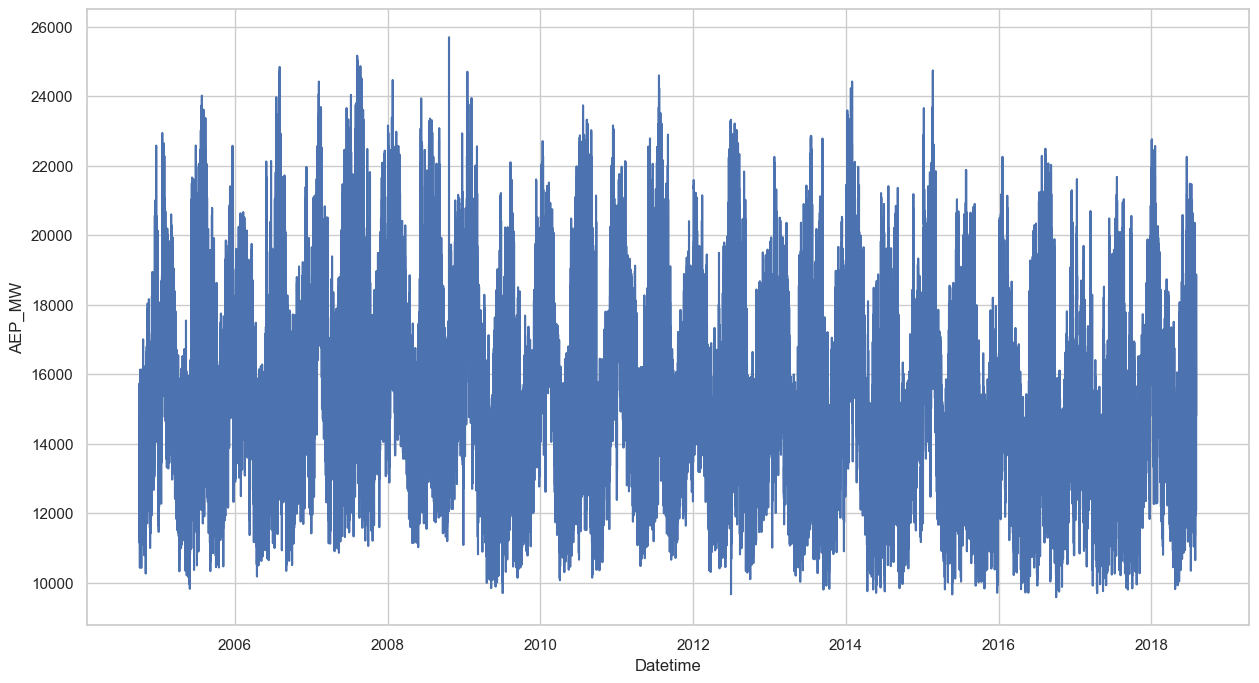

In [8]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data, x='Datetime', y='AEP_MW')

Memilih Data Setahun Terakhir Pada contoh ini kita hanya akan gunakan data setahun terakhir dari data AEP_hourly Karena data yang diobservasi per jam, maka kita akan mengambil 24*365=8760 baris terakhir dari data dan dimasukan kedalam variabel data1

In [9]:
data1 = data[-24*365:].reset_index(drop=True)
data1.head()

,Datetime,AEP_MW
0,2017-08-03 01:00:00,13682.0
1,2017-08-03 02:00:00,12841.0
2,2017-08-03 03:00:00,12443.0
3,2017-08-03 04:00:00,12213.0
4,2017-08-03 05:00:00,12286.0


<AxesSubplot: xlabel='Datetime', ylabel='AEP_MW'>

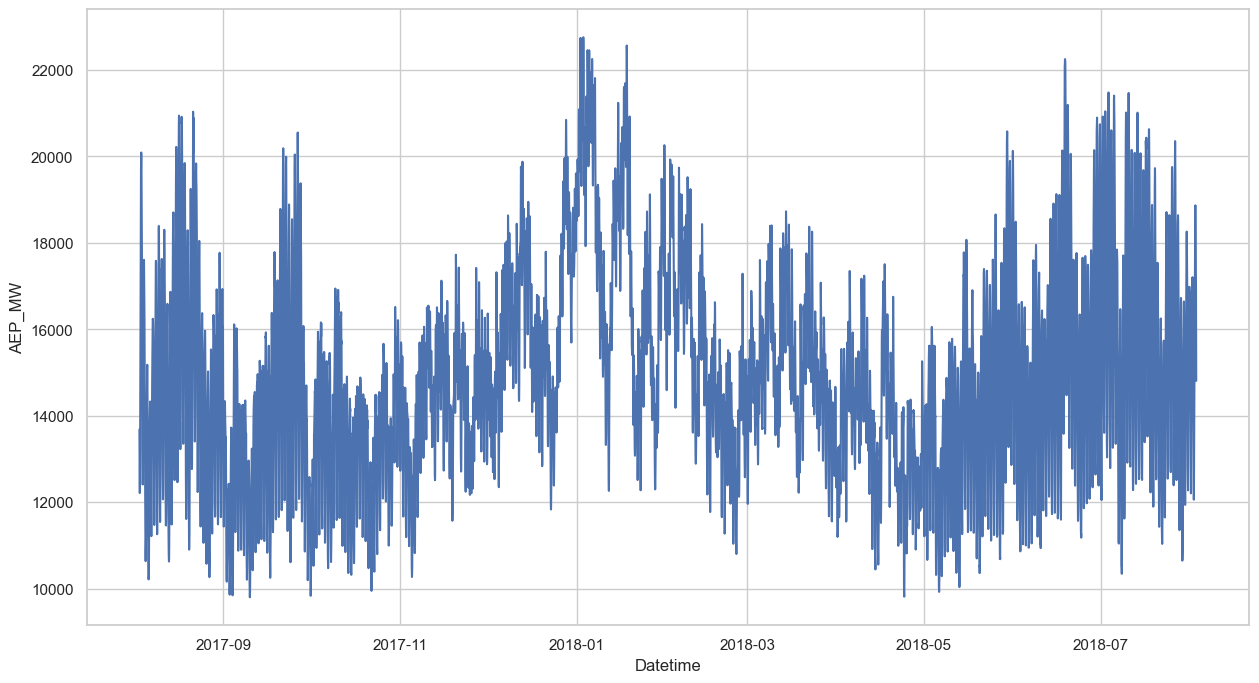

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data1, x='Datetime', y='AEP_MW')

Melihat Statistika Deskriptif dari Data Sebelum melakukan pembuatan model, sebaiknya dilakukan analisa terhadap statistika deskriptif dari data Dari statistika deskriptif tersebut, kita dapat meilhat range dari data dan ukuran pusat data

In [11]:
data1.describe()

,AEP_MW
count,8760.000000
mean,14963.130708
std,2438.848843
min,9801.000000
25%,13260.750000
50%,14721.500000
75%,16421.750000
max,22759.000000


Dari statistika deskriptif di atas terlihat bahwa data AEP_MW cukup besar dan berada pada range 9801 dan 22759 sehingga nanti kita akan lakukan feature scalling menggunakan MinMaxScaler agar range dari seluruh data tersebut berada di antara 0 dan 1

List normalisasi yang tersedia oleh sklearn : https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

Split data dilakukan agar model yang telah dilatih dapat dievaluasi kemampuannya. Karena data yang digunakan adalah data time series, maka split data tidak dilakukan secara acak Kita juga akan melakukan cross validation menggunakan data train sehingga pastikan data train yang digunakan cukup besar. Pada contoh ini kita gunakan 70% baris pertama sebagai data train dan 30% sisanya sebagai data test.

Split Dataset

In [12]:
train_size = int(len(data1) * 0.7) 
train = data1[:train_size]
test =data1[train_size:].reset_index(drop=True)

Feature Scalling Menggunakan MinMaxScaler MinMaxScaler difit pada data train agar dapat digunakan kembali pada data test maupun data observasi baru. Hasil scalling disimpan pada kolom baru yaitu 'scaled'

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(train[['AEP_MW']])

train['scaled'] = scaler.transform(train[['AEP_MW']])
test['scaled'] = scaler.transform(test[['AEP_MW']])

In [15]:
train.head()

,Datetime,AEP_MW,scaled
0,2017-08-03 01:00:00,13682.0,0.299506
1,2017-08-03 02:00:00,12841.0,0.234604
2,2017-08-03 03:00:00,12443.0,0.203889
3,2017-08-03 04:00:00,12213.0,0.186140
4,2017-08-03 05:00:00,12286.0,0.191773
